# Satellite Lake Water Temperature

This dataset provides mid-morning daily lake surface water temperature (LSWT) values derived from satellite data, along with associated uncertainty and quality levels. The data, retrieved from ATSR and AVHRR sensors, have been bias-adjusted for consistency and may contain gaps due to missing observations. LSWT is an essential climate variable critical for understanding lake ecology, hydrological processes, and large-scale climate interactions, with data development supported by the UK NERC GloboLakes project and future enhancements from the ESA Climate Change Initiative.

**Information on Dataset:**
* Source: [Satellite Lake Water Temperature](https://cds.climate.copernicus.eu/datasets/satellite-lake-water-temperature?tab=overview)
* Author: T. Tewes (City of Konstanz)
* Notebook Version: 1.4 (Updated: January 20, 2025)

## 1. Specifying the paths and working directories

In [1]:
import os

''' ---- Specify Directories Here ---- '''
download_folder = r".\data\satellite-lake-water-temperature\download"
working_folder = r".\data\satellite-lake-water-temperature\working"
geotiff_folder = r".\data\satellite-lake-water-temperature\geotiff"
csv_folder = r".\data\satellite-lake-water-temperature\csv"
output_folder = r".\data\satellite-lake-water-temperature\output"
''' ----- End of Declaration ---- '''

os.makedirs(download_folder, exist_ok=True)
os.makedirs(working_folder, exist_ok=True)
os.makedirs(geotiff_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## 2. Download and Extract the Dataset

### 2.1 Authentication

In [2]:
import cdsapi

def main():
    # API key for authentication
    api_key = "fdae60fd-35d4-436f-825c-c63fedab94a4"
    api_url = "https://cds.climate.copernicus.eu/api"

    # Creation of the CDS API client
    client = cdsapi.Client(url=api_url, key=api_key)
    return client

### 2.2 Define the "request" and Download the Dataset

In [3]:
# Define additional request fields to ensure the request stays within the file size limit.
# 
# When working with geospatial data or APIs that return map or satellite imagery,
# limiting the geographical area of interest can prevent overly large requests
# that exceed file size or processing limits. Bounding boxes are used to define
# the geographic area for such requests.
# 
# The coordinates below were obtained using the BBox Extractor tool:
# https://str-ucture.github.io/bbox-extractor/
# 
# BBox Extractor is a web-based tool that helps users interactively select and generate 
# bounding box coordinates in WGS84 format (latitude/longitude). This is especially 
# useful when working with APIs or datasets that require a geographic area input.

# Define the bounding box coordinates (WGS84 format) for the Lake Constance region.
# The coordinates are in the format: [North, West, South, East]
bbox_wgs84_constance = [48.0, 8.7, 47.3, 9.9]

In [4]:
# Specify the year of interest for the data request.
# The corresponding data version depends on the year.
year = 2009

# Determine the data version based on the year:
# Version "4_5_1" is used for years up to 2020, and "4_5_2" is used for later years.
if 1900 <= year <= 2100:  # Validate year range for robustness.
    version = "4_5_1" if year <= 2020 else "4_5_2"
else:
    raise ValueError(f"Invalid year: {year}. Please provide a year between 1900 and 2100.")

In [5]:
# Definition of the dataset and the request parameters
dataset = "satellite-lake-water-temperature"
request = {
    "variable": "all",
    "year": [f"{year}"],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "version": version,
    "area": bbox_wgs84_constance
}

In [6]:
# Uncomment this cell and execute it to download the dataset:

def main_retrieve():
    dataset_filename = f"{dataset}_{request['year'][0]}.zip"
    dataset_filepath = os.path.join(download_folder, dataset_filename)
    
    # Download the dataset only if the dataset has not been downloaded before
    if not os.path.isfile(dataset_filepath):
        # Download the dataset with the defined request parameters
        client.retrieve(dataset, request, dataset_filepath)
    else:
        print("Dataset already downloaded.")
        
if __name__ == "__main__":
    client = main()
    main_retrieve()

2025-01-21 14:30:36,374 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.


2025-01-21 14:30:36,374 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


2025-01-21 14:30:36,374 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**


2025-01-21 14:30:36,374 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Dataset already downloaded.


### 2.3 Extract the Zip folder

In [7]:
import zipfile

# Construct the dataset filename and path
dataset_filename = f"{dataset}_{year}.zip"
dataset_filepath = os.path.join(download_folder, dataset_filename)
extract_folder = os.path.join(working_folder, str(year))

# Extract the zip file
try:
    os.makedirs(extract_folder, exist_ok=True)
    
    if not os.listdir(extract_folder):
        with zipfile.ZipFile(dataset_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Successfully extracted files to: {extract_folder}")
    else:
        print("Folder is not empty. Skipping extraction.")
except FileNotFoundError:
    print(f"Error: The file {dataset_filepath} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {dataset_filepath} is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Folder is not empty. Skipping extraction.


## 3. Merge NetCDF4 Files into a Single NetCDF4 File

Many **yearly datasets** are provided as daily NetCDF4 files, where each file represents one day of the year *(365 files for regular years, 366 files for leap years)*. Managing these numerous files can be cumbersome, especially during data access or visualization.

To simplify workflows and improve data handling efficiency, all daily datasets for a given year are merged into a **single yearly NetCDF4 file**. This consolidation streamlines data processing in later stages of analysis, such as visualization or statistical evaluation.

> Important: Daily datasets may have sparse or missing data.  As a result, the merged NetCDF4, merged GeoTIFF, or individual GeoTIFF files may contain empty time instances. 

In [8]:
import xarray as xr

# Path for the merged NetCDF file
nc_filepath_merged = os.path.join(output_folder,f"{dataset}_{year}.nc")

# Check if the merged file already exists
if not os.path.isfile(nc_filepath_merged):
    # List all NetCDF files in the extract folder
    filename_list = os.listdir(extract_folder)

    if not filename_list:
        print(f"No NetCDF files found in {extract_folder}.")
    else:
        try:
            # Open and concatenate all NetCDF files along the 'time' dimension
            datasets = [xr.open_dataset(os.path.join(extract_folder, f)) for f in filename_list]
            merged_dataset = xr.concat(datasets, dim='time')
            
            # Save the merged dataset to the new NetCDF file
            merged_dataset.to_netcdf(nc_filepath_merged)
            print(f"New NetCDF4 file created at {nc_filepath_merged} for year {year}")
        
        except Exception as e:
            print(f"Error during file processing: {e}")
else:
    print(f"Merged NetCDF file already exists for {year}. Skipping merge.")

Merged NetCDF file already exists for 2009. Skipping merge.


## 4. Read the merged netCDF4 file and print the metadata

In [9]:
import netCDF4 as nc

# Open the NetCDF file in read mode
dataset = nc.Dataset(nc_filepath_merged, mode="r")

# List all variables in the dataset
variables_list = dataset.variables.keys()
print(f"Available variables: {list(variables_list)}")

Available variables: ['lake_surface_water_temperature', 'lswt_uncertainty', 'lswt_quality_level', 'lswt_obs_instr', 'lswt_flag_bias_correction', 'lakeid_CCI', 'lakeid_GloboLakes', 'lat', 'lon', 'time']


In [10]:
import pandas as pd

# Define variable name from available variables and read variable data
variable_name = 'lake_surface_water_temperature'
variable_data = dataset[variable_name]

# Create a summary of the primary variables
summary = {
    "Variable Name": variable_name,
    "Data Type": variable_data.dtype,
    "Shape": variable_data.shape,
    "Variable Info": f"{variable_data.dimensions}",
    "Units": getattr(variable_data, "units", "N/A"),
    "Long Name": getattr(variable_data, "long_name", "N/A"),
}

# Display the summary of the data set as a DataFrame for better visualisation
nc_summary = pd.DataFrame(list(summary.items()), columns=['Description', 'Details'])

# Display the summary DataFrame
nc_summary

,Description,Details
0,Variable Name,lake_surface_water_temperature
1,Data Type,int16
2,Shape,"(364, 14, 24)"
3,Variable Info,"('time', 'lat', 'lon')"
4,Units,kelvin
5,Long Name,lake surface skin water temperature


## 5. Export Dataset to CSV

### 5.1 Compute Daily Average and Export as CSV

In [11]:
# import xarray as xr

# # Open the NetCDF dataset using xarray
# def netcdf_to_dataframe(nc_file):
#     with xr.open_dataset(nc_file) as nc_dataset:
#         # Select variables and create a list
#         variables = ['lake_surface_water_temperature', 'lswt_uncertainty', 'lswt_quality_level']

#         # Convert the selected variables to a DataFrame at once
#         df = nc_dataset[variables].to_dataframe().reset_index()

#         return df

# # Create dataframe
# dataframe_merged = netcdf_to_dataframe(nc_file=nc_filepath_merged)
# dataframe_merged.head()

# # Filter all the NaN values
# dataframe_merged_filtered = dataframe_merged.dropna().reset_index(drop=True)

# # Define csv filename and filepath for the output
# csv_filename = f"satellite-lake-water-temperature-complete-{year}.csv"
# csv_filepath = os.path.join(csv_folder, csv_filename)

# # Export the pivot table as CSV if it does not already exist
# if not os.path.isfile(csv_filepath):
#     dataframe_merged_filtered.to_csv(csv_filepath, sep=',', encoding='utf8')
#     print(f"Filtered data exported successfully to {csv_filepath}")
# else:
#     print(f"File already exists at {csv_filepath}.\nSkipping export.")
#     print("Reading existing CSV file...")
#     # Read the CSV file with datetime parsing
#     dataframe = pd.read_csv(csv_filepath, parse_dates=['time'], index_col='time')

# # Modify pandas display options
# pd.options.display.float_format = '{:,.2f}'.format

# # Display DataFrame
# dataframe_merged_filtered.head()

In [12]:
# dataframe_merged_filtered['time'] = pd.to_datetime(dataframe_merged_filtered['time'])
# dataframe_merged_filtered.set_index('time', inplace=True)

# filtered_df = dataframe_merged_filtered.groupby(pd.Grouper(freq='M')).mean().reset_index()
# filtered_df

In [13]:
import netCDF4 as nc
import pandas as pd
from datetime import datetime
import numpy as np

def netcdf_to_dataframe(nc_file):
    # Open the dataset
    with nc.Dataset(nc_file, "r") as nc_dataset:
        # Extract and decode time variable
        time_var = nc_dataset.variables["time"]
        time_units = time_var.units
        time_calendar = getattr(time_var, "calendar", "standard")
        cftime = nc.num2date(time_var[:], units=time_units, calendar=time_calendar)

        # Extract and calculate temperature values
        temperature_data = nc_dataset.variables["lake_surface_water_temperature"][:]
        temperature_data_units = nc_dataset.variables["lake_surface_water_temperature"].units
        temperature_mean_list = np.nanmean(temperature_data, axis=(1, 2))
        temperature_std_list = np.nanstd(temperature_data, axis=(1, 2))
        
        # Counts the number of valid (non-NaN) pixels per day in the dataset
        # Daily dataset may have sparse or no data on some days.
        nonzero_count_list = np.count_nonzero(~np.isnan(temperature_data), axis=(1,2))

        lswt_uncertainty = nc_dataset.variables["lswt_uncertainty"][:]
        lswt_uncertainty_units = nc_dataset.variables["lswt_uncertainty"].units
        # lswt_uncertainty_mean_list = np.nanmean(lswt_uncertainty, axis=(1, 2))
        # Error propagation for uncertainty of mean temperature
        lswt_uncertainty_squared = np.nanmean(lswt_uncertainty**2, axis=(1, 2))
        lswt_mean_uncertainty = np.sqrt(lswt_uncertainty_squared)
        
        lswt_quality_level = nc_dataset.variables["lswt_quality_level"][:]
        lswt_quality_level_mean_list = np.nanmean(lswt_quality_level, axis=(1, 2))

        # Create DataFrame
        df = pd.DataFrame(
            {
                "Time": cftime,
                f"Mean Temperature ({temperature_data_units[0].capitalize()})": temperature_mean_list,
                "Std Dev": temperature_std_list,
                f"Uncertainty ({lswt_uncertainty_units[0].capitalize()})": lswt_mean_uncertainty,
                f"Mean Quality Level": lswt_quality_level_mean_list,
                "Non-Zero Count":nonzero_count_list,
            }
        )
        return df
    
# Modify display format for numbers in the DataFrames
pd.options.display.float_format = '{:,.2f}'.format

# Generate DataFrame (".dropna(): filters with NaN values)
df = netcdf_to_dataframe(nc_filepath_merged)
filtered_df = netcdf_to_dataframe(nc_filepath_merged).dropna().reset_index(drop=True)

# Generate the output file path
csv_filename = f"satellite-lake-water-temperature_daily-mean-{year}.csv"
csv_filepath = os.path.join(csv_folder, csv_filename)

# Export the filtered data to a CSV file if it doesn't already exist
if not os.path.isfile(csv_filepath):
    filtered_df.to_csv(csv_filepath, index=False)
    print(f"Filtered data exported successfully to {csv_filepath}")
else:
    print(f"File already exists at {csv_filepath}. Skipping export.")

# Display the filtered DataFrame
filtered_df.head()

File already exists at .\data\satellite-lake-water-temperature\csv\satellite-lake-water-temperature_daily-mean-2009.csv. Skipping export.


,Time,Mean Temperature (K),Std Dev,Uncertainty (K),Mean Quality Level,Non-Zero Count
0,2009-01-01 12:00:00,278.10,0.77,0.42,4.55,38.00
1,2009-01-03 12:00:00,276.89,1.20,0.27,1.43,14.00
2,2009-01-06 12:00:00,274.77,0.89,0.29,2.25,4.00
3,2009-01-08 12:00:00,276.94,1.39,0.30,3.47,32.00
4,2009-01-13 12:00:00,276.83,0.13,0.22,3.67,3.00


### 5.2 Plot Daily Average
> Note: Due to limited daily/monthly data for 2023 dataset, **Plots** do not work properly

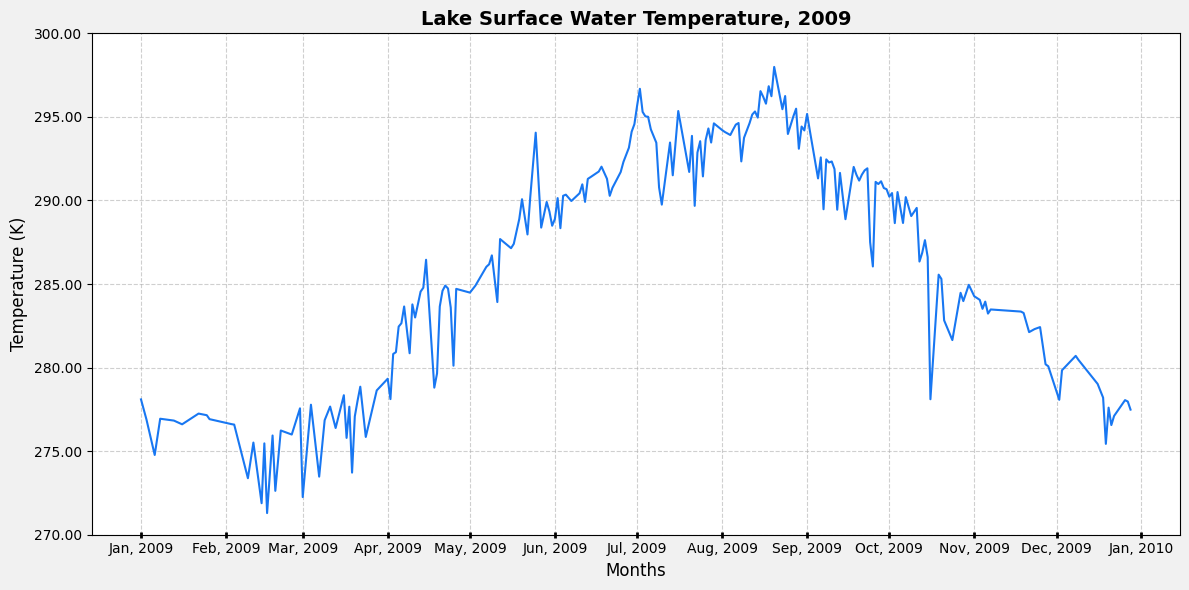

In [14]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator 
import matplotlib.ticker as ticker
import math

# Prepare df for plot
filtered_df_copy = filtered_df.copy()
filtered_df_copy['Date'] = [t.strftime('%Y-%m-%d') for t in filtered_df['Time']]
filtered_df_copy['Date'] = [datetime.strptime(d, '%Y-%m-%d').date() for d in filtered_df_copy['Date']]
vmax = math.ceil(filtered_df_copy['Mean Temperature (K)'].max() / 10) * 10
vmin = math.floor(filtered_df_copy['Mean Temperature (K)'].min() / 10) * 10

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# Plot the data
ax.plot(filtered_df_copy['Date'],
        filtered_df_copy['Mean Temperature (K)'],
        # marker='o',
        # markersize=3.0,
        linestyle='-',
        color='#1877F2',
        label="Surface Water Temperature",
        )

# Format the axis
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b, %Y'))
ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2)
ax.tick_params(axis='x', which='minor', length=3, direction='inout')

# Set y-axis limit
ax.set_ylim(vmin, vmax)

# Set axis labels and title
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Temperature (K)', fontsize=12)
ax.set_title(f'Lake Surface Water Temperature, {year}', fontsize=14, fontweight='bold')

# Add grid
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### 4.3 Plot Monthly Average

In [15]:
# Prepare data for plot
# Uncertainty calculated using error propagation
filtered_df_monthly = (
    filtered_df_copy.groupby(pd.PeriodIndex(filtered_df_copy["Date"], freq="M"))[[
        "Mean Temperature (K)", "Std Dev", "Uncertainty (K)", "Mean Quality Level"
    ]]
    .agg({
        "Mean Temperature (K)": "mean",
        "Std Dev": lambda x: (x**2).mean()**0.5,
        "Uncertainty (K)": lambda x: (x**2).mean()**0.5,
        "Mean Quality Level": "mean"
    })
    .reset_index()
)

filtered_df_monthly['Date'] = filtered_df_monthly['Date'].dt.to_timestamp()

# Generate the output file path
csv_filename = f"satellite-lake-water-temperature_monthly-mean-{year}.csv"
csv_monthly_means = csv_filepath = os.path.join(csv_folder, "monthly means")
os.makedirs(csv_monthly_means, exist_ok=True)
csv_filepath = os.path.join(csv_monthly_means, csv_filename)

# Export the filtered data to a CSV file if it doesn't already exist
if not os.path.isfile(csv_filepath):
    filtered_df.to_csv(csv_filepath, index=False)
    print(f"Monthly means exported successfully to {csv_filepath}")
else:
    print(f"File already exists at {csv_filepath}. Skipping export.")

filtered_df_monthly.head()

File already exists at .\data\satellite-lake-water-temperature\csv\monthly means\satellite-lake-water-temperature_monthly-mean-2009.csv. Skipping export.


,Date,Mean Temperature (K),Std Dev,Uncertainty (K),Mean Quality Level
0,2009-01-01,276.83,0.85,0.30,3.75
1,2009-02-01,274.93,1.04,0.36,3.07
2,2009-03-01,276.56,1.09,0.31,3.18
3,2009-04-01,282.55,1.29,0.31,3.71
4,2009-05-01,287.88,1.20,0.43,3.87


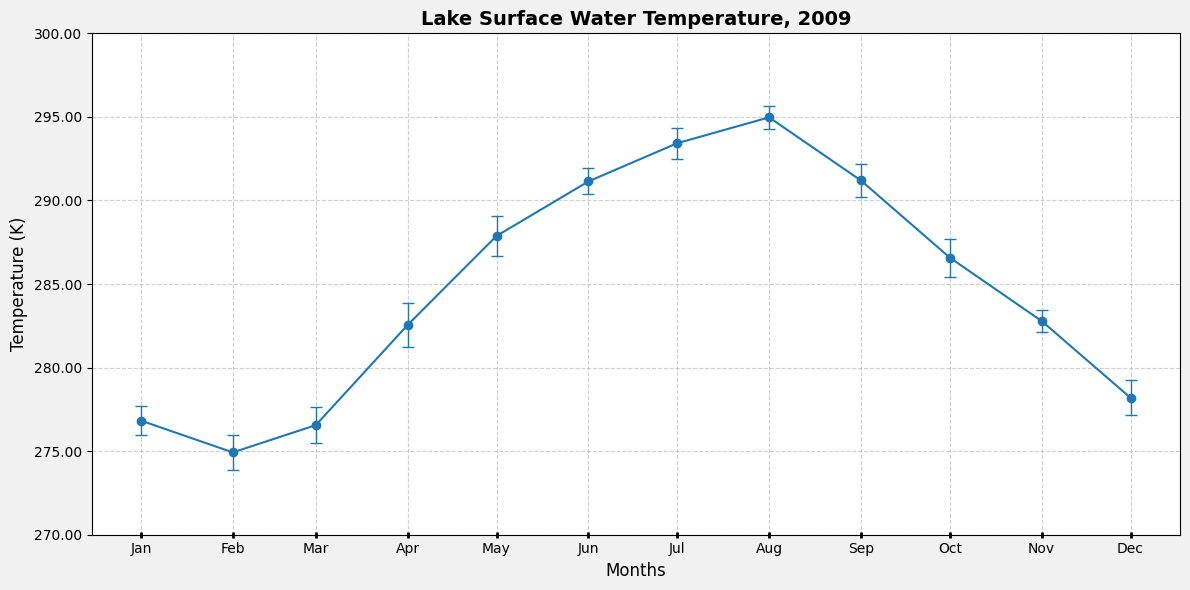

In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import numpy as np

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# Plot the data
ax.errorbar(
    filtered_df_monthly['Date'],
    filtered_df_monthly['Mean Temperature (K)'],
    yerr=filtered_df_monthly['Std Dev'],
    fmt='o-',
    label='Mean Temperature ± Uncertainty',
    capsize=4,
    elinewidth=1,
    capthick=1,
)

# Format the axis
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))

ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2)
ax.tick_params(axis='x', which='minor', length=3, direction='inout')

# Set y-axis limit
ax.set_ylim(vmin, vmax)

# Set axis labels and title
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Temperature (K)', fontsize=12)
ax.set_title(f'Lake Surface Water Temperature, {year}', fontsize=14, fontweight='bold')

# Add grid
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [17]:
# Also display missing months in xaxis

# import matplotlib.dates as mdates

# # Create the figure and axes
# fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# # Plot the data
# ax.errorbar(
#     filtered_df_monthly['Date'],
#     filtered_df_monthly['Mean Temperature (K)'],
#     yerr=filtered_df_monthly['Std Dev'],
#     fmt='o-',
#     label='Mean Temperature ± Uncertainty',
#     capsize=4,
#     elinewidth=1,
#     capthick=1,
# )

# # Generate all months
# all_months = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='MS')

# # Set x-axis ticks and labels
# ax.set_xticks(all_months)
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# ax.set_xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))

# # Set axis labels and title
# ax.set_xlabel('Months', fontsize=12)
# ax.set_ylabel('Temperature (K)', fontsize=12)
# ax.set_title(f'Lake Surface Water Temperature, {year}', fontsize=14, fontweight='bold')

# # Add grid
# ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)

# # Adjust layout and show the plot
# plt.tight_layout()
# plt.show()

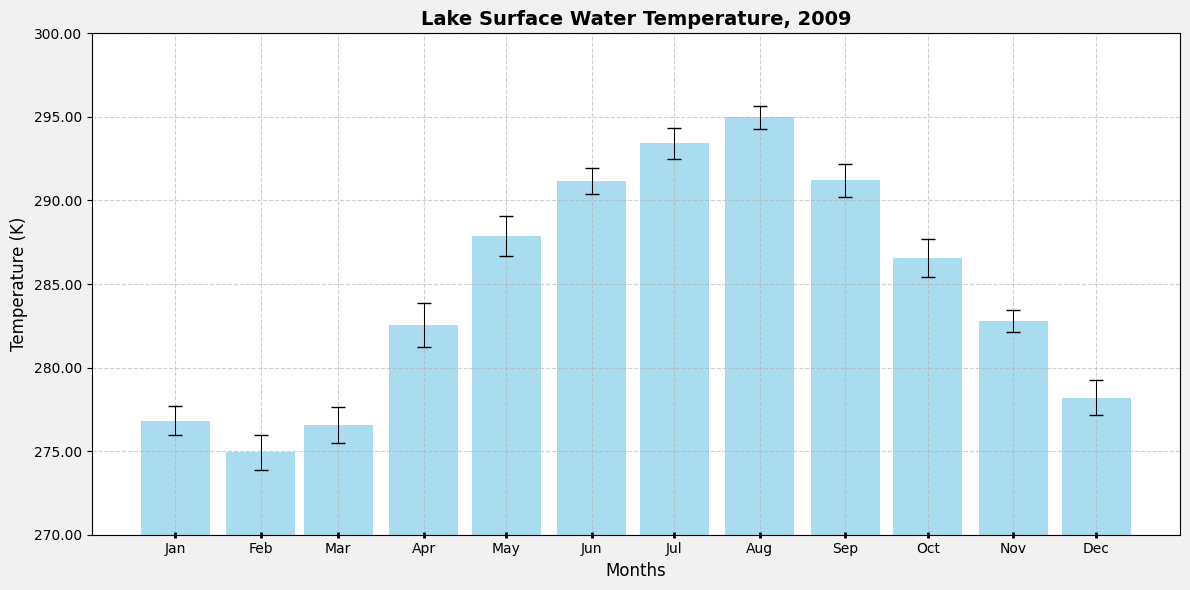

In [18]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')


# Plot the data
ax.bar(filtered_df_monthly['Date'],
       filtered_df_monthly['Mean Temperature (K)'],
       yerr=filtered_df_monthly['Std Dev'],
       color='skyblue',
       alpha=0.7,
       width=25,
       label='Mean Temperature ± Uncertainty',
       capsize=5,
       error_kw=dict(ecolor='black', lw=0.75),
       )

# Format the axis
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2) 
ax.tick_params(axis='x', which='minor', length=3, direction='inout') 

# Set y-axis limit
ax.set_ylim(vmin, vmax)

# Set axis labels and title
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Temperature (K)', fontsize=12)
ax.set_title(f'Lake Surface Water Temperature, {year}', fontsize=14, fontweight='bold')

# Add grid
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## 5. Export merged netCDF4 file to GeoTIFF

### 5.1 Export All-Year Dataset as Merged GeoTIFF File

In [19]:
import rasterio
from rasterio.transform import from_origin
import netCDF4 as nc
from tqdm.notebook import tqdm

def main_export_geotiff(nc_file):
    # Open the NetCDF dataset and read variable data
    nc_dataset = nc.Dataset(nc_file, mode='r')
    temperature_data = nc_dataset[variable_name]
    
    # Extract time variable and convert it to readable dates
    time_var = nc_dataset.variables['time']
    time_units = nc_dataset.variables['time'].units
    time_calendar = getattr(time_var, "calendar", "standard")
    cftime = nc.num2date(time_var[:], units=time_units, calendar=time_calendar)
    
    # Compute spatial resolution and raster transformation
    lat = nc_dataset['lat'][:]
    lon = nc_dataset['lon'][:]
    
    pixel_size_lat = (lat.max() - lat.min()) / (len(lat) - 1)
    pixel_size_lon = (lon.max() - lon.min()) / (len(lon) - 1)
    transform = from_origin(lon.min() - pixel_size_lon / 2,
                            lat.min() - pixel_size_lat / 2,
                            pixel_size_lon,
                            -pixel_size_lat
                            )
    
    # Create a merged GeoTIFF containing all time slices as separate bands
    output_filename = f"{variable_name}_{year}_merged.tif"
    output_folder = os.path.join(geotiff_folder, "merged_geotiff")
    os.makedirs(output_folder, exist_ok=True)
    output_filepath = os.path.join(output_folder, output_filename)
    
    if not os.path.isfile(output_filepath):
        # Create a GeoTIFF with multiple bands for each time slice
        with rasterio.open(
            output_filepath,
            "w",
            driver = "GTiff",
            dtype = str(temperature_data.dtype),
            width = temperature_data.shape[2],
            height = temperature_data.shape[1],
            count = temperature_data.shape[0],
            crs = "EPSG:4326",
            nodata = -9999,
            transform=transform,        
        ) as dst:
            for day_index in tqdm(range(temperature_data.shape[0]), desc=f"Exporting merged GeoTIFF file for {year}"):
                band_data = temperature_data[day_index,:,:]
                dt = cftime[day_index]
                band_desc = f"{dt.year:04d}-{dt.month:02d}-{dt.day:02d}"
                
                # Write each year slice as a band
                dst.write(band_data, day_index + 1)
                dst.set_band_description(day_index + 1, band_desc)
    else:
        print(f"'{output_filename}' already exists. Skipping export.")

# Export merged netCDF file to merged GeoTIFF file
nc_filename = f"satellite-lake-water-temperature_{year}.nc"
nc_filepath_merged = os.path.join(output_folder, nc_filename)
variable_name = 'lake_surface_water_temperature'

main_export_geotiff(nc_filepath_merged)

'lake_surface_water_temperature_2009_merged.tif' already exists. Skipping export.


### 5.2 Export All-Year Dataset as individual GeoTIFF File

In [20]:
import rasterio
from rasterio.transform import from_origin
import netCDF4 as nc
from tqdm.notebook import tqdm

def main_export_individual_geotiff(nc_file):
    # Open the NetCDF dataset and read variable data
    nc_dataset = nc.Dataset(nc_file, mode='r')
    temperature_data = nc_dataset[variable_name]
    
    # Extract time variable and convert it to readable dates
    time_var = nc_dataset.variables['time']
    time_units = nc_dataset.variables['time'].units
    time_calendar = getattr(time_var, "calendar", "standard")
    cftime = nc.num2date(time_var[:], units=time_units, calendar=time_calendar)
    
    # Compute spatial resolution and raster transformation
    lat = nc_dataset['lat'][:]
    lon = nc_dataset['lon'][:]
    
    pixel_size_lat = (lat.max() - lat.min()) / (len(lat) - 1)
    pixel_size_lon = (lon.max() - lon.min()) / (len(lon) - 1)
    transform = from_origin(lon.min() - pixel_size_lon / 2,
                            lat.min() - pixel_size_lat / 2,
                            pixel_size_lon,
                            -pixel_size_lat
                            )
    
    # Create year folder
    year_folder = os.path.join(geotiff_folder, f"{year}_individual_geotiff")
    os.makedirs(year_folder, exist_ok=True)

    if len(os.listdir(year_folder))==0:
        # Create individual GeoTIFF containing daily time slices
        for day_index in tqdm(range(temperature_data.shape[0]), desc=f"Exporting GeoTIFF files for {year}"):
            dt = cftime[day_index]
            band_desc = f"{dt.year:04d}-{dt.month:02d}-{dt.day:02d}"
            
            output_filename = f"{variable_name}_{band_desc}.tif"
            output_filepath = os.path.join(year_folder, output_filename)
            
            band_data = temperature_data[day_index,:,:]
            
            # Create a GeoTIFF with multiple bands for each time slice
            with rasterio.open(
                output_filepath,
                "w",
                driver = "GTiff",
                dtype = str(band_data.dtype),
                width = band_data.shape[1],
                height = band_data.shape[0],
                count = 1,
                crs = "EPSG:4326",
                nodata = -9999,
                transform=transform,        
            ) as dst:
                # Write each year slice as a band
                dst.write(band_data, 1)
                dst.set_band_description(1, band_desc)
    else:
        print(f"Folder is not empty. Skipping export.")

# Export merged netCDF file to merged GeoTIFF file
nc_filename_merged = f"satellite-lake-water-temperature_{year}.nc"
nc_filepath_merged = os.path.join(output_folder, nc_filename)
variable_name = 'lake_surface_water_temperature'

main_export_individual_geotiff(nc_filepath_merged)

Folder is not empty. Skipping export.
